# 2.3) [0.7 points] k-NN vs SVM vs Random Forest on sklearn digit data set
In this task, you are allowed to use library implementations of [**k-NN**, **SVM**, and **RandomForest**] classifiers and train them on the data set from sklearn for load digits. Do the
prediction on the test data and plot the confusion matrix for ”target test data” vs ”predicted values” for every classifier listed above. Where ”target test data” is y label from the
test sample and ”predicted values” are the result of prediction from individual classifiers.
Include the confusion matrix and the used classifier’s signature (function name, parameter
values, etc.) in the report. Document any exciting findings you may have encountered.

## Imports

In [125]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Load dataset

In [151]:
digits = load_digits()

## Explore data

In [149]:
#print features and labels of dataset
print('Features: \n{}'.format(digits.images))
print('Labels: \n{}'.format(digits.target))

Features: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Labels: 
[0 1 2 ... 8 9 8]


In [150]:
#dimension of data
print('Dimension features: \n{}'.format(digits.images.shape))
print('Dimension labels: \n{}'.format(digits.target.shape))

Dimension features: 
(1797, 64)
Dimension labels: 
(1797,)


## Format data

In [128]:
#reshape matrix from 8*8 matrix to 1*64
digits.images = np.reshape(digits.images, (digits.images.shape[0],digits.images.shape[1]*digits.images.shape[2]))
print(digits.images.shape)

(1797, 64)


## Split data into training and testing sets

In [129]:
#split data into training sets and testing sets
x_train,x_test,y_train,y_test = train_test_split(digits.images,digits.target,test_size=0.25)

### KNN

Text(0.5, 1.0, 'Confusion Matrix of kNN\nAccuracy: 0.9778')

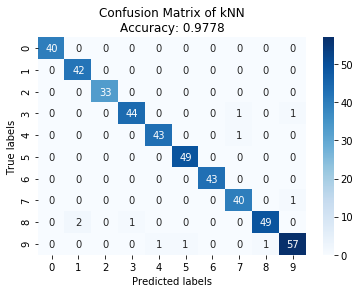

In [133]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred = clf_knn.predict(x_test)

#print("Accuracy of kNN is:")
#print(accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test,y_pred, labels = [i for i in range(10)])

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of kNN\nAccuracy: {}'.format(round(accuracy,4))) 

## SVM

Text(0.5, 1.0, 'Confusion Matrix of SVM\nAccuracy: 0.9667')

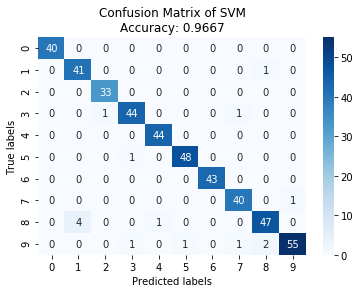

In [131]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear').fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
#print("Accuracy of SVM is:")
#print(accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred, labels = [i for i in range(10)])

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVM\nAccuracy: {}'.format(round(accuracy,4)))

## Random Forest 
### Default n_estimator

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix of Random Forest (n_estimators = 10)\nAccuracy: 0.9489')

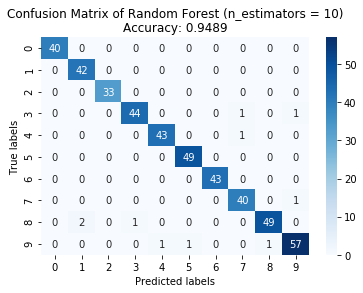

In [145]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier().fit(x_train,y_train)
y_pred = clf_rfc.predict(x_test)
#print("Accuracy of Random Forest is:")
#print(accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Random Forest (n_estimators = 10)\nAccuracy: {}'.format(round(accuracy,4)))

### n_estimator = 250

Text(0.5, 1.0, 'Confusion Matrix of Random Forest(n_estimators = 250)\nAccuracy: 0.9733')

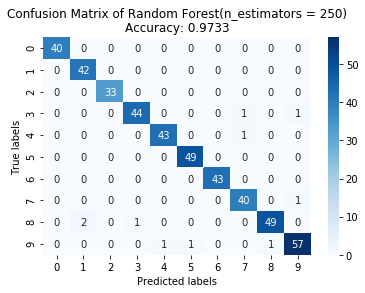

In [146]:
clf_rfc = RandomForestClassifier(n_estimators=250).fit(x_train,y_train)
y_pred = clf_rfc.predict(x_test)
#print("Accuracy of Random Forest is:")
#print(accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Random Forest(n_estimators = 250)\nAccuracy: {}'.format(round(accuracy,4)))